C:\Users\autumnsimp\AppData\Local\Temp\ipykernel_14548\1153543341.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded[binary_columns] = data_encoded[binary_columns].replace(binary_mapping)
C:\Users\autumnsimp\AppData\Local\Temp\ipykernel_14548\1153543341.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded['Academic_Achievements'] = data_encoded['Academic_Achievements'].replace(ordinal_mapping)


Random Forest Accuracy after combining classes: 0.7983978638184246


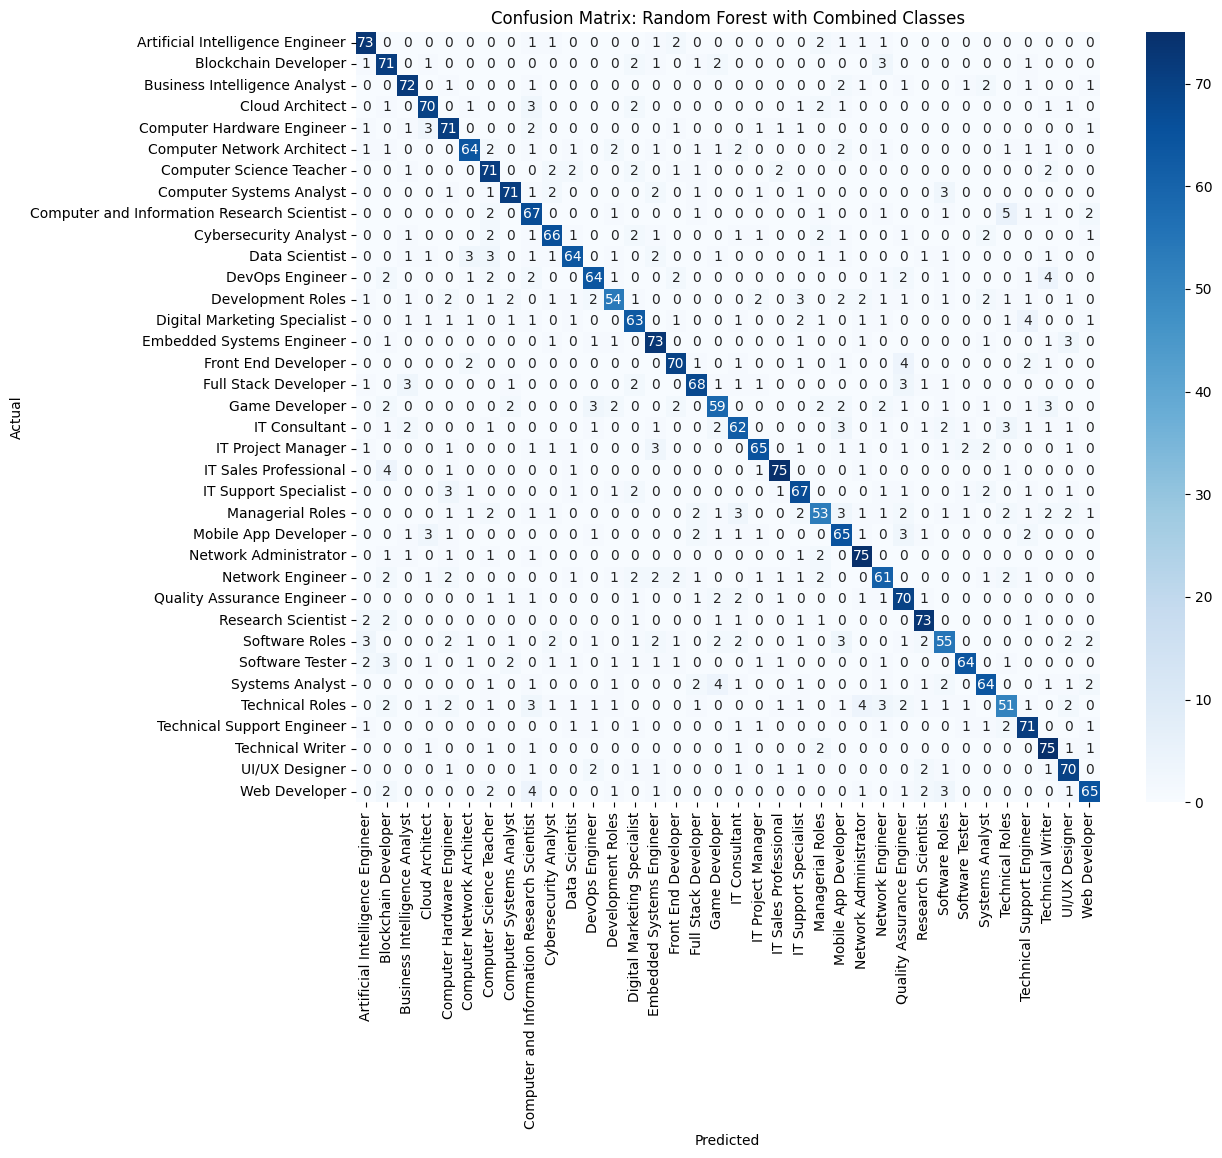

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_path = 'computer_science_student_career_datasetMar62024.csv'
dataset = pd.read_csv(data_path)

# Encoding
binary_mapping = {'Yes': 1, 'No': 0, 'Completed': 1, 'In Progress': 0}
ordinal_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

data_encoded = dataset.copy()

# Binary Encoding
binary_columns = ['Coursework_Completion_Status', 'Internship_Experience', 'Certifications_Training', 'Leadership_Experience']
data_encoded[binary_columns] = data_encoded[binary_columns].replace(binary_mapping)

# Ordinal Encoding
data_encoded['Academic_Achievements'] = data_encoded['Academic_Achievements'].replace(ordinal_mapping)

# One-Hot Encoding for Personal Interests
personal_interests_encoded = pd.get_dummies(data_encoded['Personal_Interests'], prefix='Interest')
data_encoded = pd.concat([data_encoded.drop(columns=['Personal_Interests']), personal_interests_encoded], axis=1)

# Label Encoding for Career Goals
label_encoder = LabelEncoder()
data_encoded['Career_Goals'] = label_encoder.fit_transform(data_encoded['Career_Goals'])

# Define class combinations
class_combinations = {
    'Software Developer': 'Software Roles',
    'Software Engineer': 'Software Roles',
    'Back End Developer': 'Development Roles',
    'Computer Programmer': 'Development Roles',
    'Database Administrator': 'Technical Roles',
    'Machine Learning Engineer': 'Technical Roles',
    'Computer and Information Systems Manager': 'Managerial Roles',
    'Computer Systems Manager': 'Managerial Roles'
}

# Update the target variable with combined class labels
data_encoded_combined = data_encoded.copy()
data_encoded_combined['Career_Goals'] = data_encoded_combined['Career_Goals'].apply(
    lambda x: class_combinations.get(label_encoder.inverse_transform([x])[0], label_encoder.inverse_transform([x])[0])
)

# Re-label encode the updated target variable
label_encoder_combined = LabelEncoder()
data_encoded_combined['Career_Goals'] = label_encoder_combined.fit_transform(data_encoded_combined['Career_Goals'])

# Re-split the data after combining classes
X_combined = data_encoded_combined.drop(columns=['Career_Goals'])
y_combined = data_encoded_combined['Career_Goals']

# Combine X and y for resampling
data_combined_resample = pd.concat([X_combined, y_combined], axis=1)
max_class_size_combined = data_combined_resample['Career_Goals'].value_counts().max()
balanced_data_combined = []

# Oversample each combined class
for label in data_combined_resample['Career_Goals'].unique():
    class_subset = data_combined_resample[data_combined_resample['Career_Goals'] == label]
    resampled_class = resample(class_subset, replace=True, n_samples=max_class_size_combined, random_state=42)
    balanced_data_combined.append(resampled_class)

balanced_data_combined = pd.concat(balanced_data_combined)

# Split back into X and y
X_resampled_combined = balanced_data_combined.drop(columns=['Career_Goals'])
y_resampled_combined = balanced_data_combined['Career_Goals']

# Scaling
scaler = MinMaxScaler()
X_scaled_combined = scaler.fit_transform(X_resampled_combined)

# Final Dataset after Scaling
final_dataset_combined = pd.DataFrame(X_scaled_combined, columns=X_resampled_combined.columns)
final_dataset_combined['Career_Goals'] = y_resampled_combined.reset_index(drop=True)

# Train-Test Split
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    final_dataset_combined.drop(columns=['Career_Goals']),
    final_dataset_combined['Career_Goals'],
    test_size=0.2,
    random_state=42,
    stratify=final_dataset_combined['Career_Goals']
)

# Train Random Forest Model on Combined Dataset
random_forest_model_combined = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
random_forest_model_combined.fit(X_train_combined, y_train_combined)
rf_pred_combined = random_forest_model_combined.predict(X_test_combined)

# Calculate accuracy for the combined classes
rf_accuracy_combined = accuracy_score(y_test_combined, rf_pred_combined)
print(f"Random Forest Accuracy after combining classes: {rf_accuracy_combined}")

# Confusion Matrix for the Combined Dataset
def plot_confusion_matrix(y_true, y_pred, class_labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

class_labels_combined = label_encoder_combined.classes_
plot_confusion_matrix(y_test_combined, rf_pred_combined, class_labels_combined, "Confusion Matrix: Random Forest with Combined Classes")


C:\Users\autumnsimp\AppData\Local\Temp\ipykernel_14548\97975699.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded[binary_columns] = data_encoded[binary_columns].replace(binary_mapping)
C:\Users\autumnsimp\AppData\Local\Temp\ipykernel_14548\97975699.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded['Academic_Achievements'] = data_encoded['Academic_Achievements'].replace(ordinal_mapping)


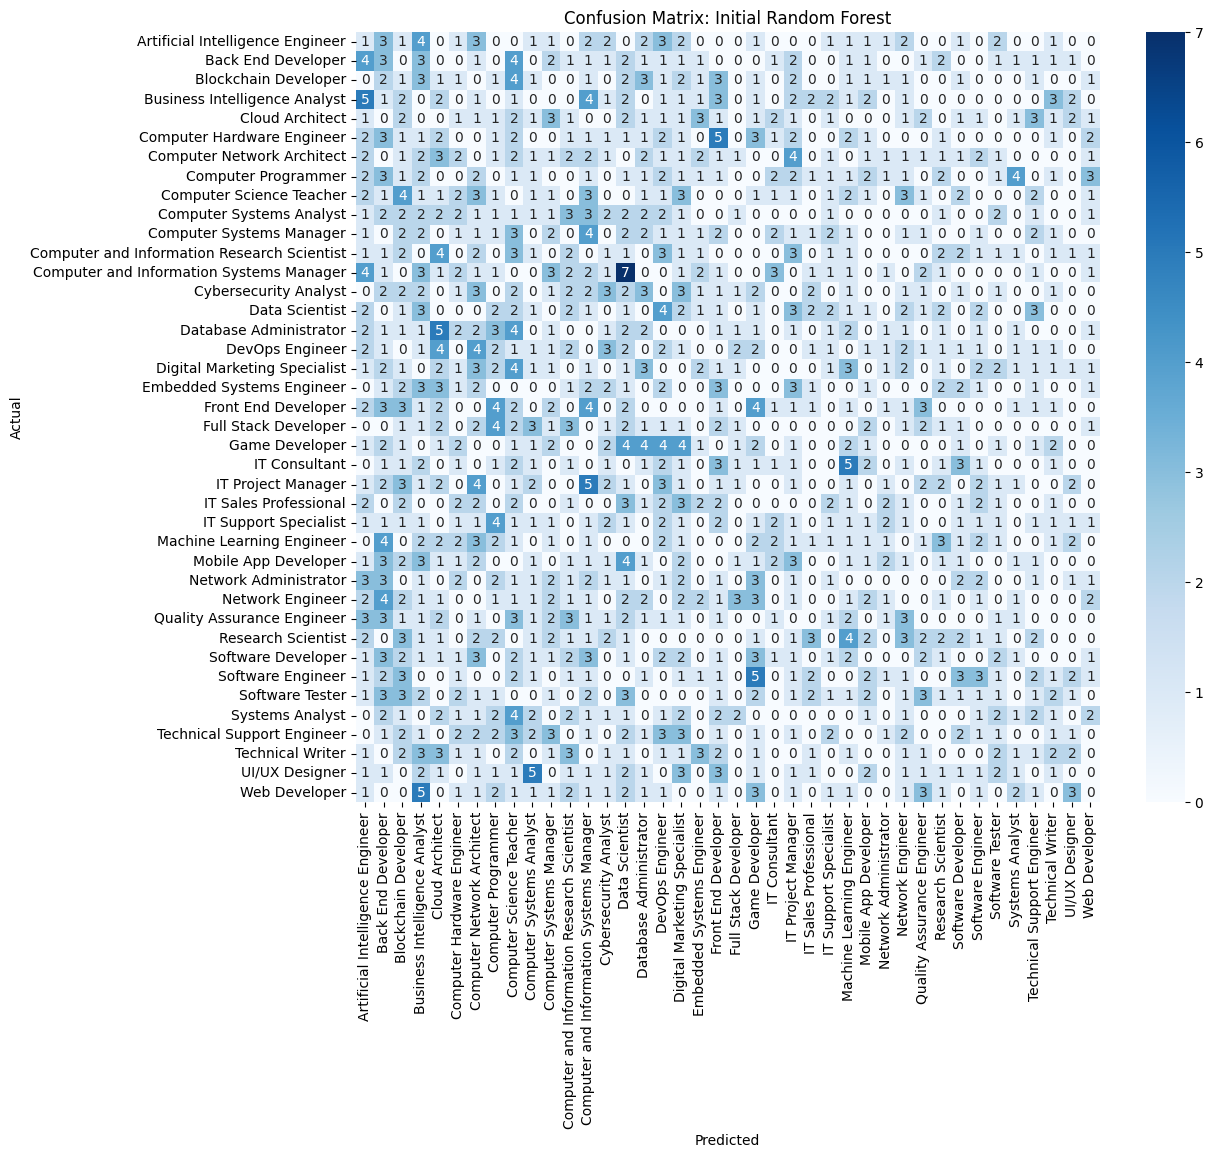

Random Forest Accuracy after combining classes: 0.78125


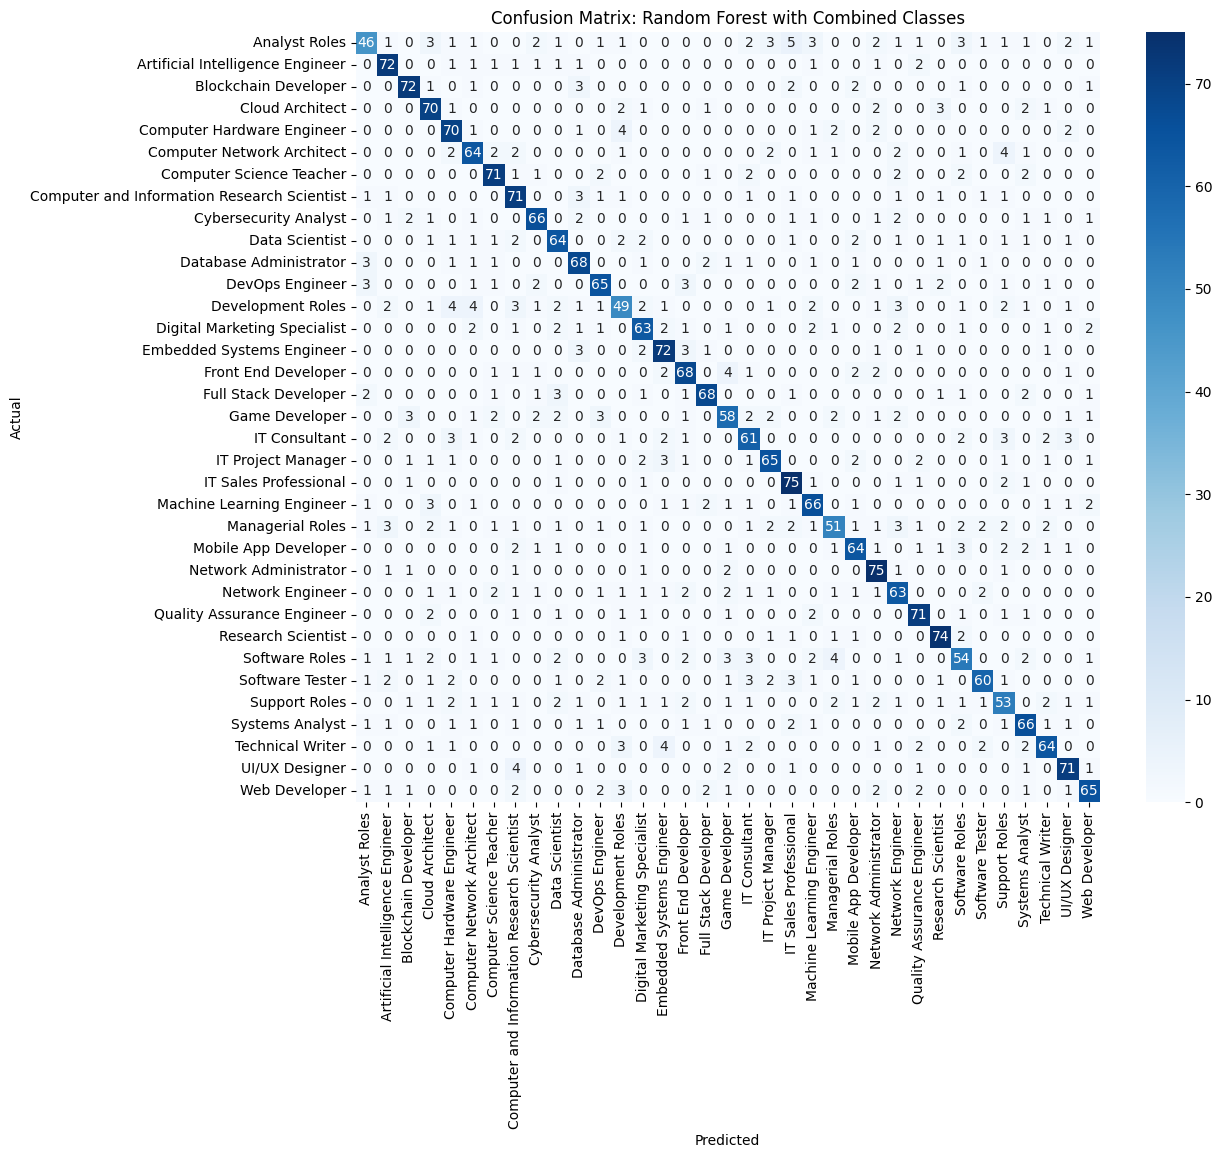

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_path = 'computer_science_student_career_datasetMar62024.csv'
dataset = pd.read_csv(data_path)

# Encoding
binary_mapping = {'Yes': 1, 'No': 0, 'Completed': 1, 'In Progress': 0}
ordinal_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

data_encoded = dataset.copy()

# Binary Encoding
binary_columns = ['Coursework_Completion_Status', 'Internship_Experience', 'Certifications_Training', 'Leadership_Experience']
data_encoded[binary_columns] = data_encoded[binary_columns].replace(binary_mapping)

# Ordinal Encoding
data_encoded['Academic_Achievements'] = data_encoded['Academic_Achievements'].replace(ordinal_mapping)

# One-Hot Encoding for Personal Interests
personal_interests_encoded = pd.get_dummies(data_encoded['Personal_Interests'], prefix='Interest')
data_encoded = pd.concat([data_encoded.drop(columns=['Personal_Interests']), personal_interests_encoded], axis=1)

# Label Encoding for Career Goals
label_encoder = LabelEncoder()
data_encoded['Career_Goals'] = label_encoder.fit_transform(data_encoded['Career_Goals'])

# Train-Test Split for Initial Model
X_initial = data_encoded.drop(columns=['Career_Goals'])
y_initial = data_encoded['Career_Goals']
X_train_initial, X_test_initial, y_train_initial, y_test_initial = train_test_split(
    X_initial, y_initial, test_size=0.2, random_state=42, stratify=y_initial
)

# Initial Random Forest Model
random_forest_initial = RandomForestClassifier(random_state=42)
random_forest_initial.fit(X_train_initial, y_train_initial)
y_pred_initial = random_forest_initial.predict(X_test_initial)
print(f"Random Forest Accuracy after combining classes: ",accuracy_score(y_pred_initial,y_test_initial))
# Initial Confusion Matrix
class_labels_initial = label_encoder.inverse_transform(sorted(y_test_initial.unique()))
cm_initial = confusion_matrix(y_test_initial, y_pred_initial)

# Plot Initial Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, class_labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_test_initial, y_pred_initial, class_labels_initial, "Confusion Matrix: Initial Random Forest")

# Define class combinations
class_combinations = {
    'Software Developer': 'Software Roles',
    'Software Engineer': 'Software Roles',
    'Back End Developer': 'Development Roles',
    'Computer Programmer': 'Development Roles',
    'Computer and Information Systems Manager': 'Managerial Roles',
    'Computer Systems Manager': 'Managerial Roles',
    'Technical Support Engineer': 'Support Roles',
    'IT Support Specialist': 'Support Roles',
    'Business Intelligence Analyst': 'Analyst Roles',
    'Computer Systems Analyst': 'Analyst Roles'
}

# Update the target variable with combined class labels
data_encoded_combined = data_encoded.copy()
data_encoded_combined['Career_Goals'] = data_encoded_combined['Career_Goals'].apply(
    lambda x: class_combinations.get(label_encoder.inverse_transform([x])[0], label_encoder.inverse_transform([x])[0])
)

# Re-label encode the updated target variable
label_encoder_combined = LabelEncoder()
data_encoded_combined['Career_Goals'] = label_encoder_combined.fit_transform(data_encoded_combined['Career_Goals'])

# Augmentation (Random Oversampling) for Combined Classes
X_combined = data_encoded_combined.drop(columns=['Career_Goals'])
y_combined = data_encoded_combined['Career_Goals']
data_combined_resample = pd.concat([X_combined, y_combined], axis=1)
max_class_size_combined = data_combined_resample['Career_Goals'].value_counts().max()
balanced_data_combined = []

for label in data_combined_resample['Career_Goals'].unique():
    class_subset = data_combined_resample[data_combined_resample['Career_Goals'] == label]
    resampled_class = resample(class_subset, replace=True, n_samples=max_class_size_combined, random_state=42)
    balanced_data_combined.append(resampled_class)

balanced_data_combined = pd.concat(balanced_data_combined)

# Split back into X and y
X_resampled_combined = balanced_data_combined.drop(columns=['Career_Goals'])
y_resampled_combined = balanced_data_combined['Career_Goals']

# Scaling
scaler = MinMaxScaler()
X_scaled_combined = scaler.fit_transform(X_resampled_combined)

# Final Dataset after Scaling
final_dataset_combined = pd.DataFrame(X_scaled_combined, columns=X_resampled_combined.columns)
final_dataset_combined['Career_Goals'] = y_resampled_combined.reset_index(drop=True)

# Train-Test Split for Combined Classes
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    final_dataset_combined.drop(columns=['Career_Goals']),
    final_dataset_combined['Career_Goals'],
    test_size=0.2,
    random_state=42,
    stratify=final_dataset_combined['Career_Goals']
)

# Train Random Forest Model on Combined Dataset
random_forest_combined = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
random_forest_combined.fit(X_train_combined, y_train_combined)
y_pred_combined = random_forest_combined.predict(X_test_combined)

# Calculate Accuracy for Combined Classes
rf_accuracy_combined = accuracy_score(y_test_combined, y_pred_combined)
print(f"Random Forest Accuracy after combining classes: {rf_accuracy_combined}")

# Confusion Matrix for Combined Classes
class_labels_combined = label_encoder_combined.classes_
plot_confusion_matrix(y_test_combined, y_pred_combined, class_labels_combined, "Confusion Matrix: Random Forest with Combined Classes")